# GRADED CHALLENGE 2 

Name        : Aan Nurliyanah

Batch       : 002

## Description

### Objective

Tugas ini adalah Graded Challenge kedua , data diambil dari `bigquery-public-data`. Tabel yang digunakan dalam tugas ini adalah tabel `waste_and_diversion` pada dataset `austin_waste`. Tabel ini berisi data sistem pembuangan dan pengelolaan sampah di kota Austin. Kolom yang digunakan diantaranya: `report_date`,`load_time`, `load_type`, `load_weight`, `dropoff_site`. Data yang digunakan tahun 2021 saja (data hanya sampai tanggal 9 Juli 2021).

### Problem Statement

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.

### Problem 1 (Stats)

1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.
  - Melihat rentang waktu pengambilan data
  - Ada apa saja tipe load sampah di kota Austin berdasarkan data
  - Mengetahui tempat pembuangan sampah ada dimana saja
  - dsb.

3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (**Caution:** Jangan gunakan pd.DataFrame.describe())

4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

5. Gunakan site yang kamu pilih untuk dicek apakah data `load_weight` ada outlier atau tidak. *Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!*. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data `load_weight`. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (`Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier`).

7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan `confidence interval`. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

8. Buatlah `analisa uji hipotesis` dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (**Ingat!** pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).


### Problem 2 (Math/Calculus)

Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan. Ada banyak teknik forecasting yang bisa dilakukan tapi kamu tidak perlu khawatir, kita akan menggunakan yang metode yang sangat sederhana yaitu menggunakan rumus kecepatan.

Asumsikan bahwa laju penambahan sampah tiap harinya dapat ditulis menggunakan rumus berikut:
<img src="https://latex2png.com/pngs/d095b902113a1ef68d07fd786e4be428.png"></img>

dimana `1` notasi hari ini dan `0` notasi hari kemarin.

Jika kita ingin memprediksi jumlah load sampah hari esok maka bisa digunakan rumus:

<img src="https://latex2png.com/pngs/50dc63299a1860b10a15346a9ca3a42e.png"></img>

Dimana `v` akan dihitung nilainya menggunakan turunan pertama dari data `load_weight` yang sebelumnya harus di-group-by berdasarkan `report_date` dan jangan lupa setelah itu `report_date` harus diurutkan dari tanggal terkecil hingga terbesar. `Δt` **bernilai 1** karena hanya ingin memprediksi nilai di satu hari kedepan.

**Catatan tambahan**: Untuk menghitung turunan, harus ditentukan terlebih dahulu sumbu x dan y nya. Jadikan `load_weight` sebagai sumbu y dan untuk sumbu x, dapat gunakan index dataframe hasil groupby jika indeksnya berupa nomor urut dari 0 hingga N-1. Jika tidak, bisa buat menggunakan `range()`.

Gunakan hasil turunan pertama pada baris terakhir dari data untuk digunakan sebagai `v`.

## Working Area

SQL Query untuk Dataset yang diambil adalah :

SELECT report_date,load_time, load_type, load_weight, dropoff_site

FROM `bigquery-public-data.austin_waste.waste_and_diversion`

WHERE report_date BETWEEN '2021-01-01' AND '2021-07-09'
ORDER BY report_date ASC

### Libraries Used

Library yang saya gunakan dalam tugas ini adalah pandas, numpy, matplotlib, scipy, dan seaborn. 
Selain untuk perhitungan matematis , library yang digunakan juga untuk membantu memvisualisasikan secara sederhana dari analisis data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


### Data Loading 

Memanggil data yang sudah di download dan di simpan di local folder dengan nama `h8dsft_P0GC2_Aan_Nurliyanah.csv` , data berasal dari Big Query Public Dataset, data diambil di bagian `bigquery-public-data`. Tabel yang digunakan dalam tugas ini adalah tabel `waste_and_diversion` pada dataset `austin_waste`.

Memanggil data dengan menggunakan pd.read_csv karena data dalam bentuk csv, juga di tambahkan dengan menambahkan na_values apabila ada data kosong yang isinya '?',' ','99999','N/A' akan didefinisikan sebagai missing values.

dataset saya namai dengan df_austin.

In [2]:
df_austin = pd.read_csv('h8dsft_P0GC2_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'])

In [3]:
df_austin

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


Setelah dataset di panggil,kemudian di cek data teratas dan data terbawahnya seperti berikut untuk melihat gambaran dari tabel menggunakan head dan tail.

In [4]:
df_austin.head(10)

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
8,2021-01-02,2021-01-02 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
9,2021-01-02,2021-01-02 12:00:00 UTC,SWEEPING,NaN,ONION CREEK


In [5]:
df_austin.tail(10)

,report_date,load_time,load_type,load_weight,dropoff_site
26147,2021-07-09,2021-07-09 12:39:00 UTC,BRUSH,7140.0,HORNSBY BEND
26148,2021-07-09,2021-07-09 05:20:00 UTC,BRUSH,5500.0,HORNSBY BEND
26149,2021-07-09,2021-07-09 03:00:00 UTC,BRUSH,5500.0,HORNSBY BEND
26150,2021-07-09,2021-07-09 06:20:00 UTC,BRUSH,5500.0,HORNSBY BEND
26151,2021-07-09,2021-07-09 03:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


### Data Cleaning

Data cleaning dilakukan untuk mengecek dan mengetahui apakah ada missing value (nilai yang hilang) di dalam tabel yang dapat menghambat proses analisis data. Metode isnull beserta sum digunakna untuk mengetahui jumlah data yang kosong di setiap baris dan kolom.

In [6]:
df_austin.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [7]:
df_austin[df_austin.isnull().any(axis=1)]

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
8,2021-01-02,2021-01-02 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
...,...,...,...,...,...
26131,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26132,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26133,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26134,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK


Dari hasil pengecekan terdapat 1048 missing value di kolom load_weight. Untuk selanjutnya akan dihilangkan data missing value tersebut dengan metode dropna.

In [8]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Pada bagian load_weight diketahui jumlah baris yang terisi = 25109 dari seluruh baris sebanyak 26157, terdapat selisih sebanyak 1048 sesuai dengan pengecekan isnull diatas. Sementara itu saya akan menghapus kolom 'load_time' karena tidak akan digunakan dan sudah mengacu kepada kolom 'report_date' saja. Kemudian dilanjutkan untuk menghilangkan missing value di kolom load_weight tadi dengan menggunakan metode dropna. 

In [9]:
#hapus kolom load_time

df_austin.drop(['load_time'],axis=1,inplace=True)

In [10]:
df_austin.dropna(axis=0,inplace=True)

In [12]:
df_austin.shape

(25109, 4)

dataset sudah terhapus tersisa 25109 baris, dan 4 kolom, bisa kita cek lagi dengan memanggil dataset df_austin

In [13]:
df_austin

,report_date,load_type,load_weight,dropoff_site
4,2021-01-02,TIRES,1640.0,MRF
5,2021-01-02,TIRES,940.0,MRF
6,2021-01-02,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
11,2021-01-02,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...
26152,2021-07-09,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,LITTER,1900.0,TDS LANDFILL


Dicek kemabali bahwa data sudah tidak ada missing value. 

In [15]:
df_austin.isnull().sum()

report_date     0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

Selanjutnya mengganti tipe data pada kolom 'report_date' karena masih berbentuk object. Tipe data diubah menjadi datetime.

In [16]:
df_austin['report_date']= pd.to_datetime(df_austin['report_date'])

In [17]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25109 entries, 4 to 26156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   25109 non-null  datetime64[ns]
 1   load_type     25109 non-null  object        
 2   load_weight   25109 non-null  float64       
 3   dropoff_site  25109 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 980.8+ KB


Tipe data untuk report_date sudah berubah. Dataset sudah siap digunakan. 

### Data Loading


Melihat rentang waktu pengambilan data menggunakan min() dan max() pada 'report_date'

In [18]:
date_min = df_austin.report_date.dt.date.min()
date_max = df_austin.report_date.dt.date.max()

print(f'Pengambilan data dimulai dari tanggal :', date_min, 'sampai dengan :', date_max) 

Pengambilan data dimulai dari tanggal : 2021-01-02 sampai dengan : 2021-07-09


Melihat ada apa saja tipe load sampah di kota Austin berdasarkan data menggunakan unique() dan melihat berapa banyak data di dalam masing-masing tipe load menggunakan value_counts().

In [19]:
tipe_load = df_austin.load_type.unique()
tipe_load

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING', 'BULK',
       'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER', 'ORGANICS',
       'BRUSH', 'SWEEPING', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [20]:
df_austin.load_type.value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Selanjutnya mengetahui tempat pembuangan sampah ada dimana saja berdasarkan data menggunakan unique() dan melihat berapa banyak data di dalam masing-masing tempat menggunakan value_counts().

In [21]:
tempat_pembuangan = df_austin.dropoff_site.unique()
tempat_pembuangan

array(['MRF', 'TDS - MRF', 'HORNSBY BEND', 'TDS LANDFILL',
       'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'AUSTIN IRON AND METAL',
       'GREAT NORTHERN', 'AUSTIN WOOD RECYCLING', 'PARK BEND',
       'ON ROUTE HIGH DUMP', 'BALCONES WOODS', 'STEINER LANDFILL',
       'WESTFIELD'], dtype=object)

In [22]:
df_austin.dropoff_site.value_counts()

TDS LANDFILL             10691
ORGANICS BY GOSH          5741
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1652
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

Menghitung central tendency (mean, median, dan modus) masing-masing site.

In [23]:
nilai_mean = df_austin.groupby('dropoff_site')['load_weight'].apply(pd.Series.mean)
nilai_median = df_austin.groupby('dropoff_site')['load_weight'].apply(pd.Series.median)
nilai_modus = df_austin.groupby('dropoff_site')['load_weight'].apply(pd.Series.mode)

Memanggil nilai mean dari setiap site

In [24]:
nilai_mean

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           19153.333333
HORNSBY BEND              6628.644068
MRF                       1799.982143
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
PARK BEND                13385.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15169.407215
WESTFIELD                16020.000000
Name: load_weight, dtype: float64

Memanggil nilai median dari setiap site

In [25]:
nilai_median

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN           21110.0
HORNSBY BEND              6390.0
MRF                       1360.0
ON ROUTE HIGH DUMP       14940.0
ORGANICS BY GOSH         11920.0
PARK BEND                12330.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
Name: load_weight, dtype: float64

Memanggil nilai modus dari setiap site

In [26]:
nilai_modus

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0     8700.0
                       1    17160.0
                       2    20900.0
                       3    21320.0
                       4    21960.0
                       5    24880.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0     4060.0
                       1     7480.0
                       2    12500.0
                       3    14940.0
                       4    15040.0
                       5    15200.0
                       6    18460.0
ORGANICS BY GOSH       0    14580.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
STE

Bagaimana dengan modus pada load_type atau dropoff site , kita akan lihat satu persatu, pengamatan nilai modus ini memungkinkan kita untuk melihat jenis load type apa yang sering terjadi pada proses pengumpulan sampah ini begitu juga tempat site mana yang sering dugunakan. 

In [27]:
nilai_modus_type = df_austin.groupby('dropoff_site')['load_type'].apply(pd.Series.mode)
nilai_modus_type

dropoff_site            
AUSTIN IRON AND METAL  0               RECYCLED METAL
AUSTIN WOOD RECYCLING  0    RECYCLING - SINGLE STREAM
BALCONES RECYCLING     0    RECYCLING - SINGLE STREAM
BALCONES WOODS         0    RECYCLING - SINGLE STREAM
GREAT NORTHERN         0          GARBAGE COLLECTIONS
HORNSBY BEND           0                        BRUSH
MRF                    0                        TIRES
ON ROUTE HIGH DUMP     0                     ORGANICS
ORGANICS BY GOSH       0                     ORGANICS
PARK BEND              0                     ORGANICS
STEINER LANDFILL       0          GARBAGE COLLECTIONS
TDS - MRF              0    RECYCLING - SINGLE STREAM
TDS LANDFILL           0          GARBAGE COLLECTIONS
WESTFIELD              0          GARBAGE COLLECTIONS
Name: load_type, dtype: object

In [28]:
nilai_modus_drop = df_austin.groupby('load_type')['dropoff_site'].apply(pd.Series.mode)
nilai_modus_drop

load_type                   
BRUSH                      0             HORNSBY BEND
BULK                       0             TDS LANDFILL
CONTAMINATED ORGANICS      0             TDS LANDFILL
CONTAMINATED RECYCLING     0             TDS LANDFILL
DEAD ANIMAL                0             TDS LANDFILL
GARBAGE COLLECTIONS        0             TDS LANDFILL
LITTER                     0             TDS LANDFILL
MIXED LITTER               0             TDS LANDFILL
ORGANICS                   0         ORGANICS BY GOSH
RECYCLED METAL             0    AUSTIN IRON AND METAL
RECYCLING - SINGLE STREAM  0       BALCONES RECYCLING
SWEEPING                   0             TDS LANDFILL
TIRES                      0                      MRF
YARD TRIMMING              0             HORNSBY BEND
Name: dropoff_site, dtype: object

Selain melihat central tendency (mean,median dan modus), kita akan melihat nilai min, max dan sum dari masing-masing site , menggunakan metode groupby dan agg. Diurutkan berdasarkan jumlah sum tertinggi ke rendah.

In [29]:
site = df_austin.groupby('dropoff_site')['load_weight'].agg(['mean','median','min','max','sum']).sort_values(by = 'sum',ascending=False)

In [30]:
site

,mean,median,min,max,sum
dropoff_site,,,,,
TDS LANDFILL,15169.407215,14920.0,0.0,245540.0,1.621761e+08
ORGANICS BY GOSH,11818.482146,11920.0,20.0,29660.0,6.784991e+07
BALCONES RECYCLING,9464.652072,9840.0,140.0,25780.0,3.631587e+07
TDS - MRF,9872.550882,10330.0,40.0,29940.0,2.910428e+07
HORNSBY BEND,6628.644068,6390.0,60.0,20460.0,1.095052e+07
MRF,1799.982143,1360.0,40.0,17500.0,3.023970e+05
GREAT NORTHERN,19153.333333,21110.0,8700.0,24880.0,1.149200e+05
ON ROUTE HIGH DUMP,12525.714286,14940.0,4060.0,18460.0,8.768000e+04
PARK BEND,13385.000000,12330.0,8480.0,20400.0,5.354000e+04


Setelah menghitung central tendency untuk setiap situs dropoff, didapatkan informasi tentang sekilas distribusi data.
Misalnya bisa kita lihat jumlah sampah terbanyak ada di dropoff site TDS Lanfill menyusul dibawahnya ada Organics by Gosh. 
Untuk nilai mean dan median nya tidak terdapat perbedaan yang signifikan artinya distribusi sampah cukup merata di 2 site tersebut. 
Namun kita harus tinjau lebih lenjut lagi untuk mengetahui analisis lengkapnya. Selanjutnya untuk distribusi total sampah jika dibandingkan dengan tingkat terbawah sangat berbeda sekali, mungkin hal ini bisa menjadi pertimbangan pemerintah untuk lebih mendistribusikan sampah ke beberapa site secara merata.

Selanjutnya saya memilih dropoff_site ORGANICS BY GOSH karena saya melihat jumlah total sampah di site tersebut di posisi kedua teratas setelah TDS Lanfill, dan di dominasi oleh sampah organics. Selanjutnya kita akan melihat  secara rinci hanya di site tersebut untuk mengetahui seberapa persebaran data di site tersebut.

Saya menggunakan nama organic_gosh untu data yang hanya berisi site 'organic by gosh' saja.

In [31]:
organic_gosh = df_austin[(df_austin['dropoff_site']=='ORGANICS BY GOSH')]

In [32]:
organic_gosh

,report_date,load_type,load_weight,dropoff_site
75,2021-01-02,ORGANICS,15800.0,ORGANICS BY GOSH
76,2021-01-02,ORGANICS,20760.0,ORGANICS BY GOSH
77,2021-01-02,ORGANICS,14450.0,ORGANICS BY GOSH
78,2021-01-02,ORGANICS,5980.0,ORGANICS BY GOSH
79,2021-01-02,ORGANICS,19540.0,ORGANICS BY GOSH
...,...,...,...,...
26125,2021-07-08,ORGANICS,13760.0,ORGANICS BY GOSH
26126,2021-07-08,ORGANICS,6180.0,ORGANICS BY GOSH
26127,2021-07-08,ORGANICS,10140.0,ORGANICS BY GOSH
26128,2021-07-08,ORGANICS,10640.0,ORGANICS BY GOSH


Melihat secara rinci load_type apa saja yang ada di site ORGANICS BY GOSH beserta nilai mean, median, min, max dan sum berdasarkan masing masing load type.

In [33]:
organic_gosh.groupby('load_type')['load_weight'].agg(['mean','median','min','max','sum']).sort_values(by = 'mean',ascending=False)

,mean,median,min,max,sum
load_type,,,,,
SWEEPING,15200.000000,15200.0,14460.0,15940.0,30400.0
RECYCLED METAL,12532.000000,11040.0,5160.0,20760.0,62660.0
ORGANICS,11855.961848,11940.0,20.0,29660.0,67744966.0
GARBAGE COLLECTIONS,7500.000000,7500.0,7500.0,7500.0,7500.0
DEAD ANIMAL,230.526316,100.0,20.0,1720.0,4380.0


In [34]:
organic_gosh['load_type'].mode()[0]

'ORGANICS'

Kita bisa melihat jumlah sampah terbanyak berada pada jenis organics. Selain itu jenis sampah yang sering dibuang juga adalah jenis organics di site tersebut.

Selanjutnya melakukan Analisis menghitung Central Tendency dan nilai minimum, maksimum dan standar deviasi untuk melihat persebaran data pada site ORGANICS BY GOSH secara keseluruhan.

In [35]:
print ('Mean: ' + str(organic_gosh['load_weight'].mean()))
print ('Median: ' + str(organic_gosh['load_weight'].median()))
print ('Mode: ' + str(organic_gosh['load_weight'].mode()[0]))
print ('Std: ' + str(organic_gosh['load_weight'].std()))
print ('Min: ' + str(organic_gosh['load_weight'].min()))
print ('Max: ' + str(organic_gosh['load_weight'].max()))

Mean: 11818.482145967602
Median: 11920.0
Mode: 14580.0
Std: 5070.763917897264
Min: 20.0
Max: 29660.0


Hasil perhitungan Central Tendency organic_gosh :

- Mean: 11818.482145967602
- Median: 11920.0
- Mode: 14580.0



menghitung besarnya nilai skew untuk mengetahui tipe distribusi dataset organic_gosh 

In [36]:
print(organic_gosh['load_weight'].skew())

0.05856144528281354


dari hasil perhitungan skew diatas diketahui :
- Dengan kondisi jika nilai skewness = 0 , maka distribusi data benar-benar simetris / normal distribution.
- Jika skewness diantara -0.5 dan 0.5 maka data fairly symmetrical.
- Jika skewness diantara -1 dan –0.5 atau antara 0.5 dan 1 maka data moderately skewed.
- Jika skewness kurang dari -1 atau lebih 1 maka data highly skewed.

Nilai skewness : 0.05856144528281354 artinya data fairly symmetrical, bisa diasumsikan bahwa dataset tersebut termasuk Distribusi normal. 
Mari kita lihat dari visualisasi plot berikut untuk lebih detailnya. 



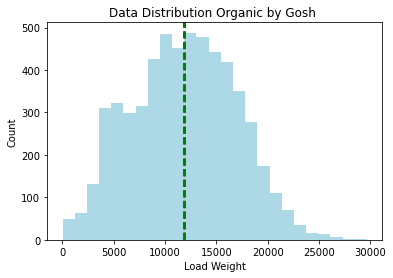

In [37]:
loadweight = organic_gosh['load_weight']
loadweight.plot.hist(title='Data Distribution Organic by Gosh ', color='lightblue', bins=25)
plt.xlabel('Load Weight')
plt.ylabel('Count')  
plt.axvline(loadweight.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(loadweight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

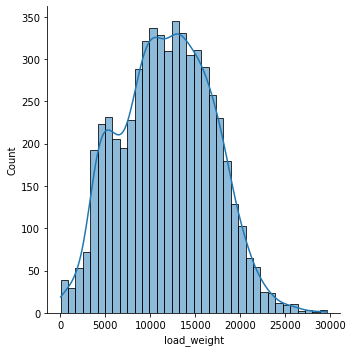

In [39]:
sns.displot(organic_gosh.load_weight, kde=True, label='Load Weight in Organic by Gosh')

Memvisualisasikan boxplot untuk lihat apakah ada outlier.

<AxesSubplot:ylabel='load_weight'>

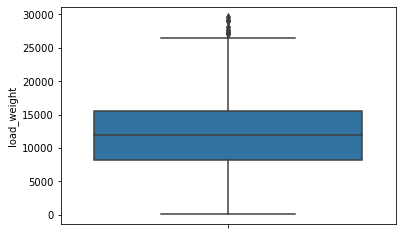

In [40]:
sns.boxplot(data=organic_gosh, y='load_weight')

Berdasarkan boxplot terdapat data outlier, mari kita cek dengan perhitungan z score, karena data merupakan distribusi normal maka kita akan menggunakan metode z-score. 


In [41]:
organic_gosh['Z-Score'] = stats.zscore(organic_gosh['load_weight'])
organic_gosh

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11040\2434580772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_gosh['Z-Score'] = stats.zscore(organic_gosh['load_weight'])


,report_date,load_type,load_weight,dropoff_site,Z-Score
75,2021-01-02,ORGANICS,15800.0,ORGANICS BY GOSH,0.785259
76,2021-01-02,ORGANICS,20760.0,ORGANICS BY GOSH,1.763501
77,2021-01-02,ORGANICS,14450.0,ORGANICS BY GOSH,0.519004
78,2021-01-02,ORGANICS,5980.0,ORGANICS BY GOSH,-1.151501
79,2021-01-02,ORGANICS,19540.0,ORGANICS BY GOSH,1.522885
...,...,...,...,...,...
26125,2021-07-08,ORGANICS,13760.0,ORGANICS BY GOSH,0.382918
26126,2021-07-08,ORGANICS,6180.0,ORGANICS BY GOSH,-1.112056
26127,2021-07-08,ORGANICS,10140.0,ORGANICS BY GOSH,-0.331041
26128,2021-07-08,ORGANICS,10640.0,ORGANICS BY GOSH,-0.232427


Perhitungan z-score sudah selesai dan kita bisa lihat nilai z-core perbaris. Selanjutnya melihat berapa banyaknya outlier dengan menggunakan batasan z-score .

In [42]:
organic_gosh[(organic_gosh['Z-Score']>3)| (organic_gosh['Z-Score']<-3)]

,report_date,load_type,load_weight,dropoff_site,Z-Score
6903,2021-02-26,ORGANICS,27620.0,ORGANICS BY GOSH,3.116472
7275,2021-03-01,ORGANICS,27300.0,ORGANICS BY GOSH,3.053360
9814,2021-03-15,ORGANICS,27240.0,ORGANICS BY GOSH,3.041526
21339,2021-06-02,ORGANICS,28120.0,ORGANICS BY GOSH,3.215085
21504,2021-06-03,ORGANICS,29660.0,ORGANICS BY GOSH,3.518813
21945,2021-06-07,ORGANICS,29000.0,ORGANICS BY GOSH,3.388644
22937,2021-06-14,ORGANICS,29160.0,ORGANICS BY GOSH,3.420200
23116,2021-06-15,ORGANICS,27120.0,ORGANICS BY GOSH,3.017859


Perhitungan dengan menggunakan batasan z-score ini menghasilkan data data yang kondisinya di luar batasan z score, batas atas diatas 3, batas bawah -3. Total data berjumlah 8 outlier. 

In [46]:
organic_gosh.shape

(5741, 5)

Dari perhitungan diatas didapatkan outliers dengan total data 8. Dari data keseluruhan 5741, total outlier hanya sebesar 0.139 %. Dapat diasumsikan bahwa jumlah nilai ekstrim ini masih sangat kecil jika dibandingkan dengan jumlah total data. 
Untuk itu dalam menangani outlier ini akan dilakukan metode censoring atau menerapkan batasan. 

In [45]:
total_outlier = 8 
total_data = 5741
presentase = (total_outlier/total_data) * 100 
presentase

0.13934854554955584

Untuk melihat batasan load_weight dari Outliers bisa menggunakan rumus berikut : 
Outliers=mean+/-3*std.

In [43]:
 
mean = organic_gosh.mean()
std = organic_gosh.std()
batas_atas = mean + (3*std)
batas_bawah = mean - (3*std)

print(batas_atas)
print(batas_bawah)

Z-Score          3.000261
load_weight    27030.7739
report_date           NaT
dtype: object
Z-Score          -3.000261
load_weight   -3393.809608
report_date            NaT
dtype: object


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11040\1446260665.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = organic_gosh.mean()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11040\1446260665.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = organic_gosh.mean()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11040\1446260665.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = organic_gosh.std()


Batasan atas untuk load weight adalah sebesar = 27030.7739

batasan bawah untuk load weight adalah sebesar -3393.809608

Selanjutnya membuat dataset baru yang sudah tidak ada outlier nya 


In [47]:
organic_gosh_new = organic_gosh[(organic_gosh['Z-Score']>-3) & (organic_gosh['Z-Score']<3)]
organic_gosh_new

,report_date,load_type,load_weight,dropoff_site,Z-Score
75,2021-01-02,ORGANICS,15800.0,ORGANICS BY GOSH,0.785259
76,2021-01-02,ORGANICS,20760.0,ORGANICS BY GOSH,1.763501
77,2021-01-02,ORGANICS,14450.0,ORGANICS BY GOSH,0.519004
78,2021-01-02,ORGANICS,5980.0,ORGANICS BY GOSH,-1.151501
79,2021-01-02,ORGANICS,19540.0,ORGANICS BY GOSH,1.522885
...,...,...,...,...,...
26125,2021-07-08,ORGANICS,13760.0,ORGANICS BY GOSH,0.382918
26126,2021-07-08,ORGANICS,6180.0,ORGANICS BY GOSH,-1.112056
26127,2021-07-08,ORGANICS,10140.0,ORGANICS BY GOSH,-0.331041
26128,2021-07-08,ORGANICS,10640.0,ORGANICS BY GOSH,-0.232427


Jumlah baris sudah berkurang dari awal 5741 - 8 = 5733 baris. Selanjutnya visualisasi kita lihat lagi outliernya. 

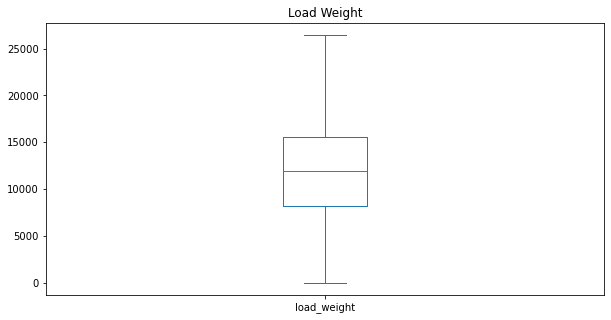

In [49]:
organic_gosh_new['load_weight'].plot(kind='box', title='Load Weight', figsize=(10,5))
plt.show()

Mencari Central Tendency untuk Data yang baru 

In [50]:
print ('Mean: ' + str(organic_gosh_new['load_weight'].mean()))
print ('Median: ' + str(organic_gosh_new['load_weight'].median()))
print ('Mode: ' + str(organic_gosh_new['load_weight'].mode()[0]))

Mean: 11795.689167974882
Median: 11900.0
Mode: 14580.0


Central Tendency sebelum menghilangkan outlier:

- Mean: 11818.482145967602
- Median: 11920.0
- Mode: 14580.0

Central Tendency sesudah menghilangkan outlier:
- Mean: 11795.689167974882
- Median: 11900.0
- Mode: 14580.0
    

In [51]:
skew2 = print(organic_gosh_new['load_weight'].skew())
skew2

0.02533146225977766


Nilai skew yang Sebelumnya 0.058 sudah berubah menjadi 0.025. Begitu pula dengan boxplot dibawah ini, sudah tidak terdapat outliers lagi.

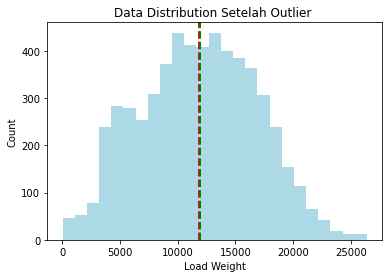

In [52]:
goshbaru = organic_gosh_new['load_weight']
goshbaru.plot.hist(title='Data Distribution Setelah Outlier ', color='lightblue', bins=25)
plt.xlabel('Load Weight')
plt.ylabel('Count')  
plt.axvline(loadweight.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(loadweight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

<AxesSubplot:ylabel='load_weight'>

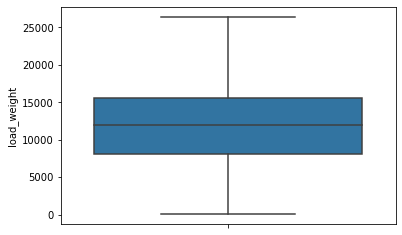

In [53]:
sns.boxplot(data=organic_gosh_new, y='load_weight')

Selanjutnya menghitung range, variance, dan standar deviasi  

In [54]:
gosh_min = organic_gosh_new['load_weight'].min()
gosh_max = organic_gosh_new['load_weight'].max()
gosh_range = gosh_max - gosh_min


gosh_std = organic_gosh_new['load_weight'].std()
gosh_var = organic_gosh_new['load_weight'].var()

In [55]:
gosh_range

26380.0

In [56]:
gosh_std

5037.304948701621

In [57]:
gosh_var

25374441.146213833

Berdasarkan peritungan diatas didapatkan data sebagai berikut : 

- range : 26380.0.0 
- standard deviasi : 5037.304948701621
- variance : 25374441.146213833

Dalam sekelompok data kuantitatif akan terdapat data dengan nilai terbesar dan data dengan nilai terkecil, untuk dataset ini besarnyay range adalah sebesar 26.380 kg, kemudian untuk standard deviasi adalah sebesar 5037.30 kg standar ini dapat menghitung seberapa jauh kecenderungan data akan melebar dari nilai rata-rata yang menjadi titik pusatnya. Untuk variance memungkinkan kita untuk memahami luasnya keragaman dalam sampel atau seluruh populasi yang besarnya adalah 25.374.441 kg

Selanjutnya Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan `confidence interval`. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?


Menurut pendapat saya, seharusnya dihitung dari keseluruhan data. karena akan lebih sesuai fakta jika kapasitas situs baru diambil dari rata-rata semua situs drop off. Untuk rata-rata nilai drop off site yang digunakan adalah rata-rata yang sudah dibersihkan dari outlier. Maka dari itu saya akan menganalisis kembali untuk dataset df_austin seperti langkah-langkah yang dilakukan pada dataset Organis_gosh sebelumnya.

Yang paling utama adalah melihat distribusi data apakah normal atau skew. Kita cari terlebih dahulu nilai skew nya.

In [58]:
df_austin['load_weight'].skew()

3.335938213321684

Nilai skew = 3.335938213321684, artinya data cenderung memiliki right skew dan terdapat outliers.
Berikut visualisasinya.

<AxesSubplot:ylabel='load_weight'>

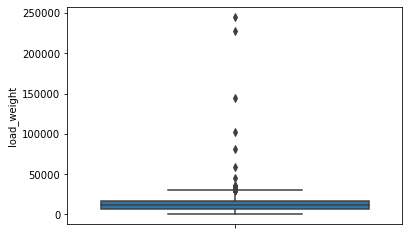

In [59]:
sns.boxplot(data=df_austin, y='load_weight')

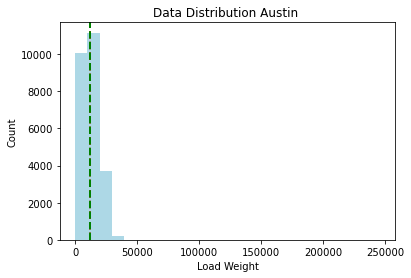

In [60]:
austin = df_austin['load_weight']
austin.plot.hist(title='Data Distribution Austin ', color='lightblue', bins=25)
plt.xlabel('Load Weight')
plt.ylabel('Count')  
plt.axvline(loadweight.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(loadweight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

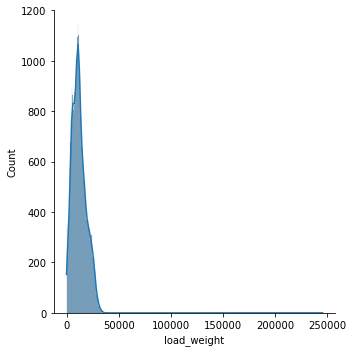

In [61]:
sns.displot(df_austin.load_weight, kde=True, label='Load Weight in Austin')

Terlihat dari visualisasi , dataset mempunyai skew right. selanjutnya menghitung central tendency dan IQR. Kita akan melakukan capping pada outlier dengan menggunakan IQR. 

In [62]:
print ('Mean: ' + str(df_austin['load_weight'].mean()))
print ('Median: ' + str(df_austin['load_weight'].median()))
print ('Mode: ' + str(df_austin['load_weight'].mode()[0]))
print ('Std: ' + str(df_austin['load_weight'].std()))
print ('Min: ' + str(df_austin['load_weight'].min()))
print ('Max: ' + str(df_austin['load_weight'].max()))

Mean: 12227.136307276274
Median: 11300.0
Mode: 5500.0
Std: 7135.059564662518
Min: 0.0
Max: 245540.0


In [63]:
Austin_Q1 = df_austin['load_weight'].quantile(q=0.25)
Austin_Q3 = df_austin['load_weight'].quantile(q=0.75)
Austin_IQR = Austin_Q3 - Austin_Q1

In [67]:
Austin_Q1

7060.0

In [69]:
Austin_Q3

16380.0

In [65]:
Austin_IQR

9320.0

In [64]:
Outlier_Austin= Austin_Q3 + (1.5*Austin_IQR)
Outlier_Austin

30360.0

Membuat batasan untuk outlier

In [66]:
df_austin["load_weight"] = np.where(df_austin['load_weight']>30360.0, 30360.0,df_austin['load_weight'])

Setelah diberi batasan, lanjut untuk megecek besarnya skew yang baru.

In [72]:
df_austin['load_weight'].skew()

0.535315437004754

Setelah membatasi outlier , Hasil skew sudah berubah dari 3.335938213321684 menjadi 0.535315437004754. 

<AxesSubplot:ylabel='load_weight'>

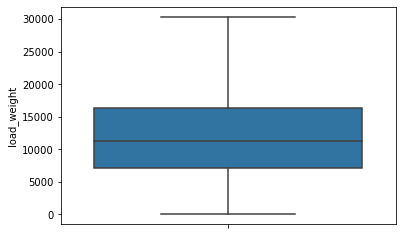

In [73]:
sns.boxplot(data=df_austin, y='load_weight')

Sudah tidak ada outlier. selanjutnya menghitung central tendency.

In [74]:
print ('Mean: ' + str(df_austin['load_weight'].mean()))
print ('Median: ' + str(df_austin['load_weight'].median()))
print ('Mode: ' + str(df_austin['load_weight'].mode()[0]))

Mean: 12191.78177304552
Median: 11300.0
Mode: 30360.0


Central tendency sebelum outlier 
- Mean: 12227.136307276274
- Median: 11300.0
- Mode: 5500.0

Central Tendency setelah outlier 
- Mean: 12191.78177304552
- Median: 11300.0
- Mode: 30360.0

In [90]:
austin_min = df_austin['load_weight'].min()
austin_max = df_austin['load_weight'].max()
asutin_range = gosh_max - gosh_min


austin_std = df_austin['load_weight'].std()
austin_var = df_austin['load_weight'].var()

In [91]:
asutin_range

26380.0

In [92]:
austin_std

6733.090119395677

In [93]:
austin_var

45334502.55590369

Berdasarkan perhitungan diatas, didapatkan :
- range : 26380.0
- std  :6733.090119395677
- var  : 45334502.55590369

Saat ini data df_austin sudah siap dan tanpa outlier. Maka dari itu kita dapat menghitung confidence interval untuk kapasitas penampungan di site baru. 
Confidence Interval yang digunakan adalah 95%.

In [79]:
CI = stats.norm.interval(0.95, df_austin['load_weight'].mean(), df_austin['load_weight'].std())
CI

(-1004.8323656324992, 25388.395911723543)

Diketahui hasil dari perhitungan diatas menerangkan bahwa kapasitas penampungan di site baru adalah 25388.39 kg. 
Untuk menghitung rata-rata kapasitas di site baru dibutuhkan data dari seluruh site , oleh karena itu saya menggunakan data secara menyeluruh. 
Dengan perhitungan ini diharapkan pada saat membangun site baru tidak terjadi kelebihan kapasitas karena sudah dihitung berdasarkan besar rata-rata seluruh site. 


### Analisa uji hipotesis

Hypothesis testing T-Test 1 Sample 2 Tailed

H0 = Mean dari organic_gosh_new = 11795
H1 = Mean dari organic_gosh_new != 11795


Central Tendency dari organic_gosh_new yang sudah dihitung sebelumnya.
- Mean: 11795.689167974882
- Median: 11900.0
- Mode: 14580.0

In [78]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(organic_gosh_new['load_weight'], 11795)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.991735222484366
t-statistics: 0.01035899958790802


c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


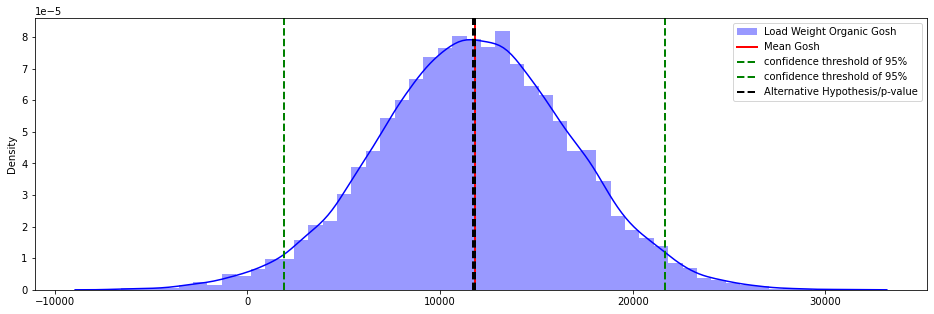

In [80]:
pop = np.random.normal(organic_gosh_new['load_weight'].mean(), organic_gosh_new['load_weight'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, organic_gosh_new['load_weight'].mean(), organic_gosh_new['load_weight'].std())

plt.figure(figsize=(16,5))
# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Load Weight Organic Gosh', color='blue')
plt.axvline(organic_gosh_new['load_weight'].mean(), color='red', linewidth=2, label='Mean Gosh ')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Berdasarkan uji Hypothesis testing T-Test 1 Sample 2 Tailed didapatkan:

H0 = Mean dari organic_gosh_new = 11795
H1 = Mean dari organic_gosh_new != 11795

hasil p-value = 0.991735222484366
artinya H0 failed to reject. Mean dari organic_gosh_new = 11795

Berdasarkan hasil perhitungan di atas dapat ditunjukkan bahwa H0 failed to reject sehingga dapat disimpulkan bahwa rata-rata `load_weight` pada organic_gosh_new tidak ada perbedaan yang signifikan yaitu  11795 kg (mean dari load_weight: 11795.689167974882 )



1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
Jawab :
Teknik handling outlier untuk dataset organic_gosh maupun df_austin menggunakan teknik censoring atau pembatasan data menggunakan batasan atas dan bawah. Alasannya karena kemungkinan data ini penting dan ingin menghindari kehilangan data atau memiliki pengaruh signifikan pada keseluruhan data.


2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
 Confidence Interval merupakan rentang nilai  perkiraan yang mencakup nilai parameter populasi sebenarnya. Tingkat kepercayaan yang digunakan pada data diatas adalah 95%. Confidence Interval mengukur tingkat ketidakpastian atau kepastian dalam metode pengambilan sampel. Kita dapat mengambil sejumlah batas probabilitas, yang paling umum adalah tingkat kepercayaan sebesar 95%. Semakin besar tingkat perkiraan ini semakin sangat hati hati pula saat menggunakan perkiraan nya.


3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
 Saya menggunakan metode T-test One Sample karena dalam analisis ini saya hanya menggunakan 1 sampel dan uji t satu sampel membandingkan rata-rata data sampel pada organic gosh dengan nilai yang diketahui.


### Problem 2 (Math/Calculus)

Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan. Ada banyak teknik forecasting yang bisa dilakukan tapi kamu tidak perlu khawatir, kita akan menggunakan yang metode yang sangat sederhana yaitu menggunakan rumus kecepatan.

Asumsikan bahwa laju penambahan sampah tiap harinya dapat ditulis menggunakan rumus berikut:
<img src="https://latex2png.com/pngs/d095b902113a1ef68d07fd786e4be428.png"></img>

dimana `1` notasi hari ini dan `0` notasi hari kemarin.

Jika kita ingin memprediksi jumlah load sampah hari esok maka bisa digunakan rumus:

<img src="https://latex2png.com/pngs/50dc63299a1860b10a15346a9ca3a42e.png"></img>

Dimana `v` akan dihitung nilainya menggunakan turunan pertama dari data `load_weight` yang sebelumnya harus di-group-by berdasarkan `report_date` dan jangan lupa setelah itu `report_date` harus diurutkan dari tanggal terkecil hingga terbesar. `Δt` **bernilai 1** karena hanya ingin memprediksi nilai di satu hari kedepan.

**Catatan tambahan**: Untuk menghitung turunan, harus ditentukan terlebih dahulu sumbu x dan y nya. Jadikan `load_weight` sebagai sumbu y dan untuk sumbu x, dapat gunakan index dataframe hasil groupby jika indeksnya berupa nomor urut dari 0 hingga N-1. Jika tidak, bisa buat menggunakan `range()`.

Gunakan hasil turunan pertama pada baris terakhir dari data untuk digunakan sebagai `v`.

Menghitung nilai delta weight:

In [81]:
nilai_w = df_austin.groupby(df_austin['report_date']).sum().sort_values('report_date')
nilai_w

,load_weight
report_date,
2021-01-02,2168870.0
2021-01-04,2920260.0
2021-01-05,2386280.0
2021-01-06,2396370.0
2021-01-07,2423710.0
...,...
2021-07-05,1895550.0
2021-07-06,1917680.0
2021-07-07,1553080.0


Menghitung nilai hasil turunan pertama 

In [82]:
v = np.diff(nilai_w['load_weight'])/np.diff(range(len(nilai_w)))
v

array([ 7.51390000e+05, -5.33980000e+05,  1.00900000e+04,  2.73400000e+04,
       -5.78760000e+05, -1.81681000e+06,  2.46847000e+06, -4.22690000e+05,
       -5.34000000e+03, -3.57300000e+04, -3.15860000e+05, -1.68213000e+06,
        2.40679000e+06, -2.67890000e+05, -7.86300000e+04, -2.97600000e+04,
       -2.86770000e+05, -1.59572000e+06,  2.31477000e+06, -4.40200000e+05,
        3.03900000e+04,  3.62200000e+04, -3.88890000e+05, -1.73503000e+06,
        2.43934000e+06, -3.61120000e+05, -8.64800000e+04,  1.16700000e+05,
       -3.72670000e+05, -1.73345000e+06,  1.17200000e+04,  2.60815000e+06,
       -5.67270000e+05,  3.84400000e+04, -1.31158000e+06,  1.08996000e+06,
       -1.83900000e+06,  1.04932000e+06,  2.64564000e+06, -4.97740000e+05,
        6.84700000e+04,  6.17100000e+04, -9.54480000e+05, -2.16782000e+06,
        1.59200000e+04,  2.95084000e+06, -2.95220000e+05, -1.06940000e+05,
       -3.82200000e+04, -3.55345000e+05, -2.17369500e+06, -5.08200000e+04,
        3.08313000e+06, -

Menghitung prediksi nilai di satu hari kedepan

In [83]:
nilai_w_besok = nilai_w['load_weight'][-1] + v[-1] * 1
abs(nilai_w_besok)

1176930.0

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang Anda gunakan?
   Metode yang digunakan untuk menghitung turunan pertama menggunakan metode numerik.

2. Apakah Anda memerlukan fungsi matematika untuk menghitung turunan? (ya/tidak) berikan alasanmu!
    Ya. Saya menggunakan fungsi matematika, karena turunan adalah laju perubahan sesaat suatu fungsi terhadap salah satu variabelnya. Sehingga menggunakan fungsi matematika dalam penerapannya yaitu diff.

3. Berapa berat beban yang Anda harapkan besok (10 Juli 2021)?
    -Saya memperkirakan akan ada beban 1176930.0 kg sampah

## Conclusions, Assumptions, Overall Analysis

Untuk dataset pertama yang saya ambil adalah organic_gosh, dataset ini masuk kedalam jenis distribusi normal karena mempunyai nilai skew dibawah 0,5 yaitu 0.058. Masih terdapat outlier di dalam dataset sehingga saya menggunakan capping untuk penanganan outliernya.  
Dan setelah dicapping nilai ekstrimnya, berat beban yang dibuang di organics_gosh 
- range : 26380 kg
- standard deviasi : 5037.30 kg
- variance : 25374441.14 kg

Kemudian untuk dataset kedua yaitu dataset keseluruhan dropoff site ,dataset ini masuk kedalam jenis distribusi skew right, setelah dibersihkan dari data outlier didapatkan data sbb:
- range : 26380 kg
- standard dveiasi  :6733.09 kg
- variance : 45334502.55 kg

-Jika pemerintah ingin menambah dropoff site baru, saya sarankan site baru tersebut memiliki kapasitas yang lebih besar dari rata-rata yaitu sebesar 25388.39 kg. Hal ini dilakukan dengan menghitung interval kepercayaan dari berat beban rata-rata semua situs dropoff yang telah dibersihkan dari outlier.

-Saya memperkirakan akan ada beban 1176930.0 kg sampah pada 10 Juli 2021.